In [56]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\stagner\anaconda3\envs\bcs\lib\site-packages (0.0)


In [57]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

# Read the CSV and Perform Basic Data Cleaning

In [59]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [60]:
# Check the information for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [61]:
# Group the categorical, continuous, and boolean variables.
cat_var = ["koi_tce_plnt_num", "koi_steff_err1", "koi_steff_err2"]
cont_var = []
boolean_var = ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec"]

df.koi_steff_err2.astype("category").cat.categories

Int64Index([-1733, -1519, -1044,  -941,  -925,  -844,  -758,  -575,  -542,
             -530,
            ...
              -44,   -43,   -42,   -41,   -40,   -37,   -33,   -25,   -24,
                0],
           dtype='int64', length=354)

# Select your features (columns)

In [62]:
# Filter the variables.
filter_df = df.copy()
filter_df = filter_df.drop(columns= cat_var)
filter_df = filter_df.drop(columns= boolean_var)
filter_df = filter_df.drop(columns= ["koi_disposition"])
cont_var = list(filter_df.columns)

In [63]:
df = df.drop(columns= boolean_var)

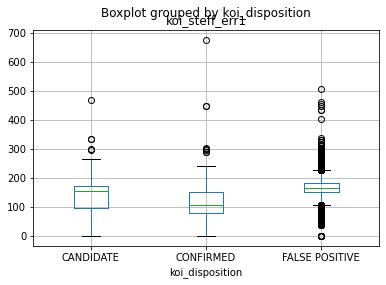

In [64]:
# Plot the KOI Disposition observations.
df.boxplot(column="koi_steff_err1", by="koi_disposition")

In [65]:
from scipy.stats import kruskal

In [66]:
for variable in cont_var:
    sample_by_group = []
    sample_by_group.append(df[variable][df.koi_disposition == "CONFIRMED"])
    sample_by_group.append(df[variable][df.koi_disposition == "CANDIDATE"])
    sample_by_group.append(df[variable][df.koi_disposition == "FALSE POSITIVE"])


    stat, p = kruskal(*sample_by_group)
    print("Variable: {} pvalue: {:.6f}".format(variable, p))

Variable: koi_period pvalue: 0.000000
Variable: koi_period_err1 pvalue: 0.000000
Variable: koi_period_err2 pvalue: 0.000000
Variable: koi_time0bk pvalue: 0.000000
Variable: koi_time0bk_err1 pvalue: 0.000000
Variable: koi_time0bk_err2 pvalue: 0.000000
Variable: koi_impact pvalue: 0.000000
Variable: koi_impact_err1 pvalue: 0.000410
Variable: koi_impact_err2 pvalue: 0.000000
Variable: koi_duration pvalue: 0.000000
Variable: koi_duration_err1 pvalue: 0.000000
Variable: koi_duration_err2 pvalue: 0.000000
Variable: koi_depth pvalue: 0.000000
Variable: koi_depth_err1 pvalue: 0.000000
Variable: koi_depth_err2 pvalue: 0.000000
Variable: koi_prad pvalue: 0.000000
Variable: koi_prad_err1 pvalue: 0.000000
Variable: koi_prad_err2 pvalue: 0.000000
Variable: koi_teq pvalue: 0.000000
Variable: koi_insol pvalue: 0.000000
Variable: koi_insol_err1 pvalue: 0.000000
Variable: koi_insol_err2 pvalue: 0.000000
Variable: koi_model_snr pvalue: 0.000000
Variable: koi_steff pvalue: 0.000000
Variable: koi_slogg pv

In [67]:
y = df.koi_disposition
df = df.drop(columns=["koi_disposition"])

In [68]:
scaler = MinMaxScaler()

for variable in list(df.columns):
    scaler.fit(df[variable].to_numpy().reshape(-1, 1))
    df[variable] = scaler.transform(df[variable].to_numpy().reshape(-1, 1))
df
    

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0.050570,1.580925e-03,0.998419,0.031063,0.006171,0.993829,0.005813,0.000690,0.992532,0.031365,...,0.953260,0.831296,0.043478,0.904667,0.004547,0.004045,0.999412,0.552405,0.733837,0.692702
1,0.018338,9.495536e-05,0.999905,0.040928,0.001006,0.998994,0.009613,0.059925,0.998702,0.011673,...,0.898442,0.845778,0.029891,0.825223,0.004219,0.008977,0.999249,0.784312,0.733360,0.700058
2,0.001379,1.607143e-06,0.999998,0.036828,0.000187,0.999813,0.012658,0.001344,0.998449,0.016184,...,0.899596,0.849539,0.036005,0.833168,0.003791,0.007744,0.999355,0.259712,0.742947,0.713365
3,0.002116,2.390944e-05,0.999976,0.037781,0.001971,0.998029,0.006954,0.002747,0.991942,0.010750,...,0.878246,0.825842,0.047554,0.791460,0.005208,0.012868,0.998719,0.406994,0.739203,0.706091
4,0.003618,6.689414e-05,0.999933,0.038804,0.003324,0.996676,0.007559,0.001625,0.991032,0.021487,...,0.866128,0.834869,0.036685,0.772592,0.004797,0.012136,0.998989,0.751443,0.739105,0.723035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.007778,1.177226e-03,0.998823,0.008506,0.027577,0.972423,0.007589,0.000269,0.990880,0.033525,...,0.912291,0.799135,0.156929,0.812314,0.005442,0.012059,0.997804,0.864094,0.659700,0.620878
6987,0.000250,6.696429e-07,0.999999,0.008276,0.000283,0.999717,0.012420,0.000596,0.999174,0.022079,...,0.904212,0.842957,0.023777,0.805362,0.004413,0.009131,0.999239,0.792725,0.667345,0.588148
6988,0.001382,1.134503e-04,0.999887,0.009235,0.013500,0.986500,0.000427,0.004945,0.999275,0.021298,...,0.873053,0.826970,0.038043,0.777557,0.005125,0.013138,0.998902,0.304294,0.671749,0.643938
6989,0.000394,1.542730e-05,0.999985,0.008629,0.004994,0.995006,0.001458,0.003612,0.997522,0.005044,...,0.863820,0.827534,0.038043,0.777557,0.005181,0.013138,0.998902,0.654426,0.672578,0.695843


In [69]:
y[y == "FALSE POSITIVE"] = "NOT CONFIRMED"
y[y == "CANDIDATE"] = "NOT CONFIRMED"
y.unique()

array(['CONFIRMED', 'NOT CONFIRMED'], dtype=object)

In [70]:
X = df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.8043478260869565

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("amt neighbors: {}, score: {:.4f}%".format(i, score * 100))

amt neighbors: 1, score: 76.0297%
amt neighbors: 2, score: 73.4554%
amt neighbors: 3, score: 78.8330%
amt neighbors: 4, score: 77.1739%
amt neighbors: 5, score: 79.2334%
amt neighbors: 6, score: 78.4325%
amt neighbors: 7, score: 79.8055%
amt neighbors: 8, score: 79.9771%
amt neighbors: 9, score: 80.6636%
amt neighbors: 10, score: 80.4348%
amt neighbors: 11, score: 81.1785%
amt neighbors: 12, score: 81.0641%
amt neighbors: 13, score: 80.7208%
amt neighbors: 14, score: 80.5492%
amt neighbors: 15, score: 80.9497%
amt neighbors: 16, score: 80.8924%
amt neighbors: 17, score: 81.0069%
amt neighbors: 18, score: 80.7208%
amt neighbors: 19, score: 80.8352%
amt neighbors: 20, score: 80.5492%
amt neighbors: 21, score: 80.7208%
amt neighbors: 22, score: 80.5492%
amt neighbors: 23, score: 80.4348%
amt neighbors: 24, score: 80.6636%
amt neighbors: 25, score: 80.7780%
amt neighbors: 26, score: 80.3204%
amt neighbors: 27, score: 80.7780%
amt neighbors: 28, score: 80.8352%
amt neighbors: 29, score: 81.

In [72]:
for i in range(1, 30):
    model = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("amt neighbors: {}, score: {:.4f}%".format(i, score * 100))

amt neighbors: 1, score: 87.3570%
amt neighbors: 2, score: 87.8719%
amt neighbors: 3, score: 87.5858%
amt neighbors: 4, score: 88.3867%
amt neighbors: 5, score: 87.4142%
amt neighbors: 6, score: 87.8146%
amt neighbors: 7, score: 87.7002%
amt neighbors: 8, score: 88.0435%
amt neighbors: 9, score: 87.3570%
amt neighbors: 10, score: 87.8146%
amt neighbors: 11, score: 88.7300%
amt neighbors: 12, score: 87.5858%
amt neighbors: 13, score: 87.9291%
amt neighbors: 14, score: 87.9863%
amt neighbors: 15, score: 87.0709%
amt neighbors: 16, score: 87.4714%
amt neighbors: 17, score: 87.6430%
amt neighbors: 18, score: 87.0137%
amt neighbors: 19, score: 88.1579%
amt neighbors: 20, score: 87.3570%
amt neighbors: 21, score: 87.8719%
amt neighbors: 22, score: 87.5858%
amt neighbors: 23, score: 88.6728%
amt neighbors: 24, score: 88.2151%
amt neighbors: 25, score: 87.9863%
amt neighbors: 26, score: 88.0435%
amt neighbors: 27, score: 88.2723%
amt neighbors: 28, score: 87.0137%
amt neighbors: 29, score: 87.

In [73]:
model = svm.SVC(decision_function_shape= "ovo").fit(X_train, y_train)
score = model.score(X_test, y_test)
print("amt neighbors: {}, score: {:.4f}%".format(i, score * 100))

amt neighbors: 29, score: 77.8032%


In [74]:
model = MLPClassifier(max_iter= 500, hidden_layer_sizes= (200, 50, 100, 50), learning_rate= "adaptive").fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8827231121281465

In [75]:
model = MultinomialNB().fit(X_test, y_test)
model.score(X_test, y_test)

0.7431350114416476

In [76]:
# Set features. This will also be used as your x values.
selected_features = df[['names', 'of', 'selected', 'features', 'here']]

KeyError: "None of [Index(['names', 'of', 'selected', 'features', 'here'], dtype='object')] are in the [columns]"

# Create a Train Test Split

Use `koi_disposition` for the y values

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)